# CASE STUDY BI PART

> ### This notebook consists three parts :
> 1. Visualize traffic in all channels 

> 2. Visualize the Conversion Rates in each onboarding steps 

> 3. Analysis the causing of low conversion rate in the process (Given the sparsity of the dataset, this analysis only using the Organic traffic)



###### Before each section started, assumptions and steps are wroted in the beginning

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
rcParams.update({'figure.autolayout': True})
%matplotlib inline

In [2]:
rcParams['figure.figsize'] = 8, 6
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 350)

## 1) BI PART

In [146]:
user_channel = pd.read_csv("User_channels.csv",delimiter=",")
user_conv = pd.read_csv("User_journey.csv",delimiter=',') 

In [112]:
print(user_channel.head())
print(user_conv.head())

                           anonymous_id     attributed_channel
0  0000A0C6-9361-4D49-89CF-26CF45C405D1     Instagram Installs
1  0001A23F-2B57-4C83-A9B2-0312410256BB   Adwords UAC Installs
2  0002AB38-AB1D-43AB-AF2E-1A301B8C54F2                Organic
3  0002DEB7-F955-409A-A725-1DD68E82DAB8  Off-Facebook Installs
4  000365EF-E564-4E3C-91AA-FDFF0ED07C59                Organic
                           anonymous_id                event_text                         timestamp language os_name
0  008B280E-E055-46C3-AFB7-AC134D3D12A8                   appOpen  2018-01-04 20:13:51.246000+01:00   German     iOS
1  008B280E-E055-46C3-AFB7-AC134D3D12A8     Application Installed  2018-01-04 20:13:51.266000+01:00   German     iOS
2  008B280E-E055-46C3-AFB7-AC134D3D12A8  sectionOnboardingSlide 0  2018-01-04 20:13:59.909000+01:00   German     iOS
3  008B280E-E055-46C3-AFB7-AC134D3D12A8      sectionNotifications  2018-01-04 20:14:07.456000+01:00   German     iOS
4  008B280E-E055-46C3-AFB7-AC134D3D12

#### Descriptive Stats for user_channel

In [6]:
print(user_channel.describe())

                                anonymous_id attributed_channel
count                                    100                100
unique                                   100                 14
top     00422C70-43B8-4DBA-9994-480935DE4D4D            Organic
freq                                       1                 53


In [7]:
print(user_channel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
anonymous_id          100 non-null object
attributed_channel    100 non-null object
dtypes: object(2)
memory usage: 1.7+ KB
None



### 1.11) Bring the most traffic to our app and generate installs

In [8]:
user_channel.groupby(['attributed_channel']).size().sort_values(ascending=False)

attributed_channel
Organic                        53
Instagram Installs             12
Facebook Installs              12
Off-Facebook Installs           6
Twitter Installs                4
Liftoff                         4
Leverate_CPI-3                  2
Website                         1
Snapchat Installs               1
Smartbanner                     1
Facebook Messenger Installs     1
Blog_Posts                      1
Adwords UAC Installs            1
Adwords Search                  1
dtype: int64

In [9]:
df = user_channel.groupby(['attributed_channel'])['anonymous_id'].count().reset_index(name='count')\
                        .sort_values(['count'], ascending=False) 

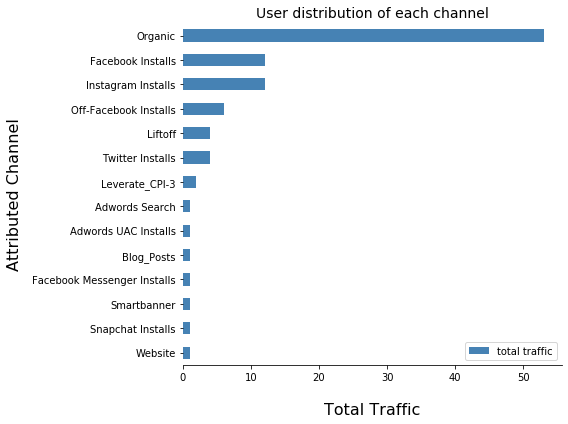

In [111]:
ax = df.plot.barh(x='attributed_channel',y='count',color='steelblue')
ax.invert_yaxis()
ax.set_title('User distribution of each channel',fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel("Attributed Channel", fontsize=16,labelpad=10)
ax.set_xlabel("Total Traffic", fontsize=16,labelpad=20)

ax.legend(['total traffic'])
plt.savefig('task1_1')


### 1.12) Show the highest Acquisition Rate (conversion rate from install to sign up success)


> merge two table, User_channel and User_journey to have the extra infomation about on_boarding process

>  first, add a new boolean column 'converted'. if the user finished all steps,i.e, values in 'event_text' contain 'signUpSuccess',  then the value in column 'converted' is 1, else it is 0 

>    second, group the data based on the user anonymous_id, so we can tell which user has converted. (the number of user after grouping is supposed to be equal to the number of unique user we observed in the begining)
    
    
>    finnaly, group the data from second step based on attributed_channel and compute mean value on 'converted'

> In addition, add one sanity check to make sure the mentationed computation is correct

In [11]:
join_table = pd.merge(user_channel,user_conv,on='anonymous_id')

In [12]:
join_table.head()

,anonymous_id,attributed_channel,event_text,timestamp,language,os_name
0,0000A0C6-9361-4D49-89CF-26CF45C405D1,Instagram Installs,appOpen,2018-05-28T13:16:08.336+02:00,German,iOS
1,0000A0C6-9361-4D49-89CF-26CF45C405D1,Instagram Installs,Application Installed,2018-05-28T13:16:08.364+02:00,German,iOS
2,0000A0C6-9361-4D49-89CF-26CF45C405D1,Instagram Installs,sectionOnboardingSlide 0,2018-05-28T13:16:10.687+02:00,German,iOS
3,0000A0C6-9361-4D49-89CF-26CF45C405D1,Instagram Installs,Install Attributed,2018-05-28T13:16:16.719+02:00,German,iOS
4,0000A0C6-9361-4D49-89CF-26CF45C405D1,Instagram Installs,sectionNotifications,2018-05-28T13:16:30.107+02:00,German,iOS


In [13]:
join_table['converted'] = join_table['event_text'].apply(lambda x: 1 if x=='signUpSuccess' else 0)

In [15]:
user_signup = join_table.groupby(['attributed_channel','anonymous_id'])['converted'].sum().reset_index()

In [17]:
channel_conversion = user_signup.groupby(['attributed_channel'])['converted'].mean().round(2).reset_index(name='conversion_rate')

In [116]:
channel_conversion.sort_values('conversion_rate',ascending=False)

,attributed_channel,conversion_rate
13,Website,1.00
3,Facebook Installs,0.33
8,Off-Facebook Installs,0.33
9,Organic,0.09
5,Instagram Installs,0.08
0,Adwords Search,0.00
1,Adwords UAC Installs,0.00
2,Blog_Posts,0.00
4,Facebook Messenger Installs,0.00
6,Leverate_CPI-3,0.00


#### Sannity check:
> check in the joined table when 'attributed_channel' is 'Website', whether all unique anonymous_id have finsihed all steps 

In [19]:
join_table.query('attributed_channel =="Website"')['anonymous_id'].nunique() == \
join_table.query('attributed_channel =="Website"').query('event_text == "signUpSuccess"')['anonymous_id'].nunique()

True

In [20]:
join_table[join_table['attributed_channel']=='Website']

,anonymous_id,attributed_channel,event_text,timestamp,language,os_name,converted
1688,00A8A726-BEF0-43F1-A212-B1C713C2A612,Website,appOpen,2018-03-24T16:26:44.228+01:00,German,iOS,0
1689,00A8A726-BEF0-43F1-A212-B1C713C2A612,Website,Application Installed,2018-03-24T16:26:44.259+01:00,German,iOS,0
1690,00A8A726-BEF0-43F1-A212-B1C713C2A612,Website,sectionOnboardingSlide 0,2018-03-24T16:26:49.041+01:00,German,iOS,0
1691,00A8A726-BEF0-43F1-A212-B1C713C2A612,Website,sectionOnboardingSlide 1,2018-03-24T16:27:01.443+01:00,German,iOS,0
1692,00A8A726-BEF0-43F1-A212-B1C713C2A612,Website,sectionOnboardingSlide 2,2018-03-24T16:27:03.276+01:00,German,iOS,0
1693,00A8A726-BEF0-43F1-A212-B1C713C2A612,Website,sectionNotifications,2018-03-24T16:27:04.067+01:00,German,iOS,0
1694,00A8A726-BEF0-43F1-A212-B1C713C2A612,Website,sectionNotificationAccepted,2018-03-24T16:27:13.235+01:00,German,iOS,0
1695,00A8A726-BEF0-43F1-A212-B1C713C2A612,Website,sectionChooseFirstTaxYear,2018-03-24T16:27:33.680+01:00,German,iOS,0
1696,00A8A726-BEF0-43F1-A212-B1C713C2A612,Website,firstTaxYearChosen,2018-03-24T16:27:36.354+01:00,German,iOS,0
1697,00A8A726-BEF0-43F1-A212-B1C713C2A612,Website,Install Attributed,2018-03-24T16:27:38.773+01:00,German,iOS,0


### Conclusion for 1.1) and 1.2)

#### Organic is the channel brings the most traffic  (53%)
#### However, Organic is not the one has the highest overall Acquistion Rate. Need to further analysis the causing.
#### Website is the channel having 100% Acquistion Rate, but only 1% of the traffic comes from Website. Since the traffic is so small in the given data, it is hard to gain insight. 


The following blocks are only for plotting

And we are interested only in channels that have conversersion rate

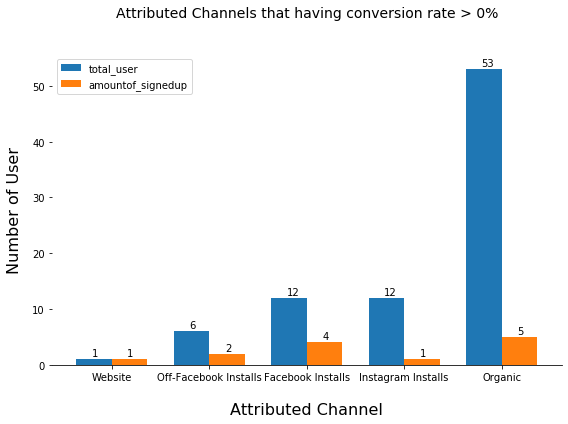

In [135]:
traffice_conversion= pd.merge(df, channel_conversion, on='attributed_channel')
traffice_conversion = traffice_conversion.rename(columns={'count':'total_user'})
traffice_conversion['amountof_signedup'] = round(traffice_conversion['total_user'] * traffice_conversion['conversion_rate'])
traffice_conversion_plot = pd.melt(traffice_conversion[['attributed_channel','total_user','amountof_signedup']],id_vars =['attributed_channel'])
traffice_conversion_plot = traffice_conversion_plot.set_index(['attributed_channel', 'variable']).value.unstack()


traffice_conversion_plot.columns = pd.CategoricalIndex(traffice_conversion_plot.columns.values,
                                 ordered=True,
                                 categories=['total_user','amountof_signedup'])
traffice_conversion_plot= traffice_conversion_plot.sort_index(axis=1)
traffice_conversion_plot = traffice_conversion_plot[traffice_conversion_plot['amountof_signedup']>0]
traffice_conversion_plot = traffice_conversion_plot.iloc[np.argsort(traffice_conversion_plot.amountof_signedup / traffice_conversion_plot.total_user).values[::-1]]
color = ['tab:blue','tab:orange']
ax = traffice_conversion_plot.sort_values('total_user',ascending=True).plot.bar(width=0.73,color=color,rot=0)
ax.set_ylabel("Number of User", fontsize=16,labelpad=10)
ax.set_xlabel("Attributed Channel", fontsize=16,labelpad=20)
ax.set_title("Attributed Channels that having conversion rate > 0%",fontsize=14).set_position([.5, 1.1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)


for i in ax.patches:
    ax.text(i.get_x()+0.16, i.get_height()+.5, \
            str(int((i.get_height()))), color='black')

plt.savefig('task1_2')

In [137]:
traffice_conversion_plot

,total_user,amountof_signedup
attributed_channel,,
Website,1.0,1.0
Off-Facebook Installs,6.0,2.0
Facebook Installs,12.0,4.0
Organic,53.0,5.0
Instagram Installs,12.0,1.0


#### 1.2) Visualize the Conversion Rates of each of the events/steps in the onboarding
> overall conversion rates of each steps 

> break down into segmentation : conversion rates of each steps of each channel for channels having conversersion rate.

Only take 
'appOpen','Application Installed','sectionChooseFirstTaxYear', 'firstTaxYearChosen','lastWhoAreYouSeen','lastWhoAreYouAnswered','serviceContinueSuccess','sectionSignUp','signUpSuccess' 
as revelant steps for the analysis

In [147]:
user_conv['timestamp']= pd.to_datetime(user_conv['timestamp'])

In [148]:
step_conv = user_conv.groupby(['event_text'])['anonymous_id'].nunique().reset_index(name='unique_user')

In [149]:
step_conv

,event_text,unique_user
0,Application Installed,100
1,Install Attributed,97
2,appClosed,6
3,appOpen,100
4,appSetToBackground,97
5,firstTaxYearChosen,92
6,lastWhoAreYouAnswered,78
7,lastWhoAreYouSeen,79
8,sectionChooseFirstTaxYear,93
9,sectionNotificationAccepted,44


In [150]:
funnel =['appOpen','Application Installed','sectionOnboardingSlide 0','sectionOnboardingSlide 1','sectionOnboardingSlide 2',\
         'sectionChooseFirstTaxYear','firstTaxYearChosen','lastWhoAreYouSeen','lastWhoAreYouAnswered',\
         'serviceContinueSuccess','sectionSignUp','signUpSuccess']

In [151]:
step_conv['event_text'] = pd.Categorical(step_conv['event_text'], funnel)
step_conv=step_conv.sort_values('event_text').dropna()
step_conv.reset_index(drop=True, inplace=True)

In [152]:
step_conv['last_event_user'] =  step_conv['unique_user'].shift(periods=1)

In [155]:
step_conv['conv_rate'] = round(step_conv['unique_user']/step_conv['last_event_user'],2)

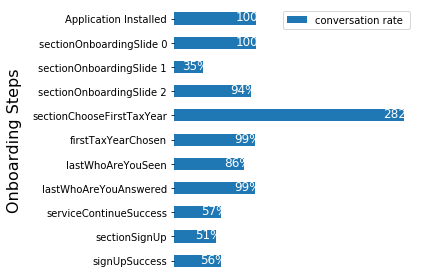

In [268]:
step_conv=step_conv[step_conv['event_text']!='appOpen']
ax2 = step_conv.plot.barh('event_text','conv_rate')
for i in ax2.patches:
    ax2.text(i.get_width()-.25, i.get_y()+.34, \
            str((int(i.get_width()*100)))+'%', fontsize=12, color='white')
    
ax2.set_ylabel("Onboarding Steps", fontsize=16,labelpad=10)
ax2.set_xlabel("Conversation rate", fontsize=16,labelpad=20)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.legend(['conversation rate '])
ax2.invert_yaxis()

#### Conclusions: 
1. sectionOnboardingSlide seems to be not helpful, users incline to skip them. Maybe those are not necessary, and we can set a A/B testing to see if removing them causes any user leaving
2. The drop from serviceContinueSuccess looks reasonable, since not all users are supported by the app.
3. However, half of users that are supported didn't sign up. Breaking down into each channel to figure out the reason 

#### Join table for analyzing on boarding process per channel( WITHOUT sectionOnboardingSlide )

In [273]:
join_table = pd.merge(user_channel,user_conv,on='anonymous_id')
join_table['timestamp']= pd.to_datetime(join_table['timestamp'],utc=True)

In [274]:
join_step_conv = join_table.groupby(['event_text','attributed_channel'])['anonymous_id'].nunique().reset_index(name='unique_user')
join_step_conv['event_text'] = pd.Categorical(join_step_conv['event_text'], funnel)
join_step_conv=join_step_conv.sort_values('event_text').dropna()
join_step_conv.reset_index(drop=True, inplace=True)
join_step_conv = join_step_conv.pivot(index='event_text',columns='attributed_channel',values='unique_user')

join_step_conv.fillna(0,inplace=True)

In [275]:
seg_plot = join_step_conv[['Organic','Facebook Installs','Instagram Installs','Off-Facebook Installs']].reset_index(level=[0])
seg_plot_nohelp= seg_plot[~seg_plot['event_text'].isin(['sectionOnboardingSlide 0','sectionOnboardingSlide 1','sectionOnboardingSlide 2'])]

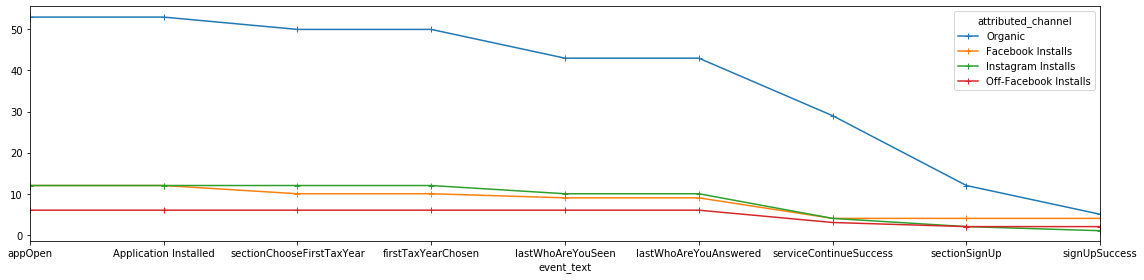

In [276]:
ax11 = seg_plot_nohelp.plot(x='event_text',figsize=(16, 4),marker='+', mfc='black')

> Look at users from Organic and has trigged serviceContinueSuccess

> put the user_id and the first time when they trigged serviceContinueSuccess into a dictory and find out the next event after serviceContinueSuccess

In [277]:
os = join_table[(join_table['attributed_channel']=='Organic')& (join_table['event_text']=='serviceContinueSuccess')].anonymous_id
ogranic_table = join_table[join_table['anonymous_id'].isin(os)]
ogranic_table.sort_values('timestamp')
ogranic_table['signup_success']= ogranic_table['event_text'].apply(lambda x: 1 if x =='sectionSignUp' else 0)
ogranic_table['continue_success']= ogranic_table['event_text'].apply(lambda x: 1 if x =='serviceContinueSuccess' else 0)

C:\Users\DE108470\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\DE108470\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [278]:
select_table = ogranic_table.copy()
select_table['continue_success']= select_table.apply(lambda x :1 if (x['signup_success'] == 1 or x['continue_success'] ==1)  else 0 ,axis=1)
id_not_sign = select_table.groupby(['anonymous_id']).agg({'continue_success':sum,'signup_success':sum}).reset_index().query('signup_success == 0').anonymous_id
table_not_sign = select_table[(select_table['signup_success']==0)&(select_table['continue_success']==1) ]
table= table_not_sign.drop_duplicates(subset='anonymous_id',keep='first')
time_mapper =dict(zip(table.anonymous_id, table.timestamp))

In [279]:
reason = select_table[select_table['anonymous_id'].isin(id_not_sign)]
result = reason.apply(lambda x: x if x['timestamp']>time_mapper[x['anonymous_id']] else pd.Series([]),axis=1).dropna()

#### The next pages after "serviceContinueSuccess"

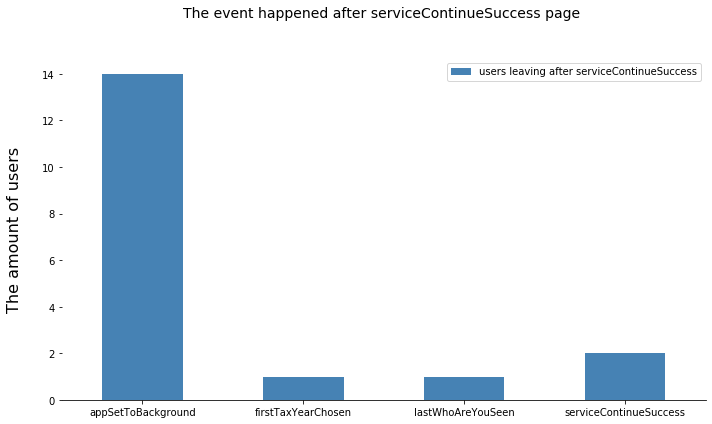

In [280]:
sorted_group = result.groupby('anonymous_id').apply(lambda x: x.sort_values(["timestamp"])).reset_index(drop=True)
top_3 = sorted_group.groupby('anonymous_id').head(1)
ax9 = top_3.groupby('event_text',as_index=False)['anonymous_id'].count().plot.bar('event_text',figsize=(10,6),color='steelblue',
                                                                                rot=0)
ax9.legend(['users leaving after serviceContinueSuccess'])


ax9.set_title("The event happened after serviceContinueSuccess page ", fontsize=14).set_position([.5, 1.1])
ax9.set_ylabel("The amount of users", fontsize=16,labelpad=20)
ax9.set_xlabel("", fontsize=16,labelpad=20)

ax9.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.spines['left'].set_visible(False)
plt.savefig('reason')
